In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [12]:
def plot3D(x,y,p):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")

    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [13]:
def laplace2D(p,y,dx,dy,l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[1:-1,2:]+pn[1:-1,0:-2])+dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1]))/(2*(dx**2+dy**2))
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]
        p[-1,:] = p[-2,:]
        l1norm = np.sum(np.abs(p[:])-np.abs(pn[:]))/np.sum(np.abs(pn[:]))
   
    return p

In [14]:
#Define the domain

nx = 31
ny = 31
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)

#Initial Conditions
p = np.zeros((ny,nx))

#Plotting aids
x = np.linspace(0,2,nx)
y = np.linspace(0,1,ny)

#Boundary Conditions
p[:,0] = 0
p[:,-1] = y
p[0,:] = p[1,:]
p[-1,:] = p[-2,:]


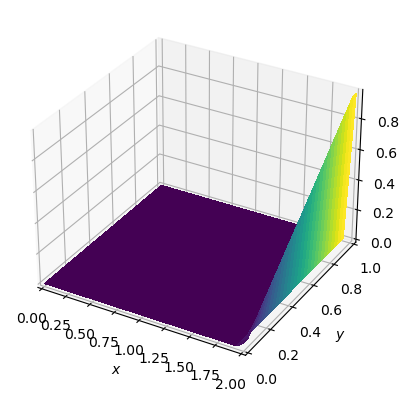

In [15]:
plot3D(x,y,p)

In [17]:
p = laplace2D(p, y, dx, dy, 1e-4)

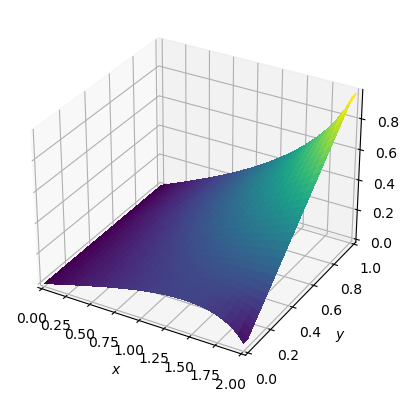

In [18]:
plot3D(x,y,p)